In [1]:
# Importando os módulos que serão utilizados

import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import time
import dill
import pandas as pd
import plotly.express as ply_exp
import plotly.graph_objects as ply_go

# Configurando o acesso do tensorflow aos processadores do computador
# no caso, está sendo selecionada a primeira placa de vídeo listada

# gpus = tf.config.experimental.list_physical_devices('GPU') # Listando as placas de vídeo
# tf.config.experimental.set_memory_growth(gpus[0], True)    # Selecionando a primeira GPU e configurando

# Importando os módulos contendo as funções criadas no projeto

from aux_func_V3 import *
import API_Numpy
import API_TensorFlow

In [10]:
# Problema de 123
interval=10
n_pts=200
Δx=interval/(n_pts-1)
x=np.arange(-interval/2,interval/2,Δx)
γ=1.4
CFL=0.5
FinalTime=1
BoundaryCondition=FronteiraFixa
ρ=np.where(x<0,1,1)
u=np.where(x<0,-2,2)
p=np.where(x<0,0.4,0.4)
E=p/(γ-1)+ρ*(u**2)/2

Q=np.stack([ρ,ρ*u,E],axis=0)

f=lambda Q: Q[0]

Q_final=Sim(Q, FinalTime, Δx, CFL, BoundaryCondition)

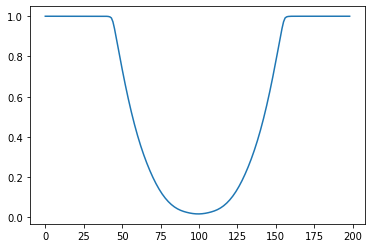

In [11]:
plt.plot(f(Q_final))

In [2]:
Sim_JS    = simulation(API_Numpy, euler_equation, WENO_JS, mapping = null_mapping, map_function = None).Sim
Sim_Z     = simulation(API_Numpy, euler_equation, WENO_Z , mapping = null_mapping, map_function = None).Sim
Sim_Zp    = simulation(API_Numpy, euler_equation, WENO_Zp, mapping = null_mapping, map_function = None).Sim
Sim_JS_M  = simulation(API_Numpy, euler_equation, WENO_JS, mapping = post_mapping, map_function = Henrick_mapping).Sim
Sim_Z_M   = simulation(API_Numpy, euler_equation, WENO_Z , mapping = post_mapping, map_function = Henrick_mapping).Sim
Sim_Zp_M  = simulation(API_Numpy, euler_equation, WENO_Zp, mapping = post_mapping, map_function = Henrick_mapping).Sim
Sim_JS_MS = simulation(API_Numpy, euler_equation, WENO_JS, mapping =  pre_mapping, map_function = Hong_mapping).Sim
Sim_Z_MS  = simulation(API_Numpy, euler_equation, WENO_Z , mapping =  pre_mapping, map_function = Hong_mapping).Sim
Sim_Zp_MS = simulation(API_Numpy, euler_equation, WENO_Zp, mapping =  pre_mapping, map_function = Hong_mapping).Sim
Sim_JS_BI = simulation(API_Numpy, euler_equation, WENO_JS, mapping =  pre_mapping, map_function = BI_mapping).Sim
Sim_Z_BI  = simulation(API_Numpy, euler_equation, WENO_Z , mapping =  pre_mapping, map_function = BI_mapping).Sim
Sim_Zp_BI = simulation(API_Numpy, euler_equation, WENO_Zp, mapping =  pre_mapping, map_function = BI_mapping).Sim

Sim_Zm    = simulation(API_Numpy, euler_equation, WENO_ZC, mapping =     null_mapping, map_function = None).Sim
Sim_Zm_M  = simulation(API_Numpy, euler_equation, WENO_ZC, mapping = post_inv_mapping, map_function = Henrick_mapping).Sim
Sim_Zm_MS = simulation(API_Numpy, euler_equation, WENO_ZC, mapping =  pre_inv_mapping, map_function = Hong_mapping).Sim
Sim_Zm_BI = simulation(API_Numpy, euler_equation, WENO_ZC, mapping =  pre_inv_mapping, map_function = BI_mapping).Sim

In [4]:

# Riemann problem of Lax
#-------------------------------------------------------------------
# t_final  = 0.13
# n        = 200
# interval = [-0.5, 0.5]
# fator    = 40
# n_ref    = n*fator

# BoundaryCondition = FronteiraFixa
#-------------------------------------------------------------------

# Riemann problem of Sod
#-------------------------------------------------------------------
t_final  = 2
n        = 200
interval = [-5, 5]
fator    = 40
n_ref    = n*fator

BoundaryCondition = FronteiraFixa
#-------------------------------------------------------------------

# Shock density wave Titarev–Toro
#-------------------------------------------------------------------
# t_final  = 5
# n        = 1000
# interval = [-5, 5]
# fator    = 8
# n_ref    = n*fator

# BoundaryCondition = FronteiraFixa
#-------------------------------------------------------------------

# Shock density wave Shu–Osher
#-------------------------------------------------------------------
# t_final  = 1.8
# n        = 200
# interval = [-5, 5]
# fator    = 40
# n_ref    = n*fator

# BoundaryCondition = FronteiraFixa
#-------------------------------------------------------------------

# Blast wave
#-------------------------------------------------------------------
# t_final  = 0.038
# n        = 400
# interval = [0, 1]
# fator    = 8
# n_ref    = n*fator

# BoundaryCondition = FronteiraReflexiva
#-------------------------------------------------------------------

Δx     = (interval[1]-interval[0])/n
Δx_ref = (interval[1]-interval[0])/n_ref

x     = tf.range(interval[0], interval[1], Δx    , dtype=float_pres)
x_ref = tf.range(interval[0], interval[1], Δx_ref, dtype=float_pres)

CFL = 0.5
γ   = 1.4    

# Riemann problem of Lax
#-------------------------------------------------------------------
# ρ = np.where(x < 0, 0.445, 0.5)
# u = np.where(x < 0, 0.698, 0.0)
# p = np.where(x < 0, 3.528, 0.5710)
# E = p/(γ-1)+ρ*(u**2)/2
#-------------------------------------------------------------------

# Riemann problem of Sod
#-------------------------------------------------------------------
ρ = np.where(x < 0, 0.125, 1)
u = x-x
p = np.where(x < 0, 0.1  , 1)
E = p/(γ-1)+ρ*(u**2)/2
#-------------------------------------------------------------------

# Shock density wave Titarev–Toro
#-------------------------------------------------------------------
# k = 20
# ρ = np.where(x < -4.5, 1.515695, 1+np.sin(k*np.pi*x)/10)
# u = np.where(x < -4.5, 0.523346, 0)
# p = np.where(x < -4.5, 1.805000, 1)
# E = p/(γ-1)+ρ*(u**2)/2
#-------------------------------------------------------------------

# Shock density wave Shu–Osher
#-------------------------------------------------------------------
# k = 5
# ρ = np.where(x < -4, 3.857143, 1+0.2*np.sin(k*x))
# u = np.where(x < -4, 2.629369, 0)
# p = np.where(x < -4, 31/3    , 1)
# E = p/(γ-1)+ρ*(u**2)/2
#-------------------------------------------------------------------

# Blast wave
#-------------------------------------------------------------------
# ρ = x-x+1
# u = x-x
# p = np.where(  x < 0.1, 1000, 0.01)
# p = np.where(0.9 <   x,  100,    p)
# E = p/(γ-1)+ρ*(u**2)/2
#-------------------------------------------------------------------

Q = np.stack([ρ,ρ*u,E], axis=0)

# Riemann problem of Lax
#-------------------------------------------------------------------
# ρ = np.where(x_ref < 0, 0.445, 0.5)
# u = np.where(x_ref < 0, 0.698, 0.0)
# p = np.where(x_ref < 0, 3.528, 0.5710)
# E = p/(γ-1)+ρ*(u**2)/2
#-------------------------------------------------------------------

# Riemann problem of Sod (referência)
#-------------------------------------------------------------------
ρ = np.where(x_ref < 0, 0.125, 1)
u = x_ref-x_ref
p = np.where(x_ref < 0, 0.1  , 1)
E = p/(γ-1)+ρ*(u**2)/2
#-------------------------------------------------------------------

# Shock density wave Titarev–Toro (referência)
#-------------------------------------------------------------------
# k = 20
# ρ = np.where(x_ref < -4.5, 1.515695, 1+np.sin(k*np.pi*x_ref)/10)
# u = np.where(x_ref < -4.5, 0.523346, 0)
# p = np.where(x_ref < -4.5, 1.805000, 1)
# E = p/(γ-1)+ρ*(u**2)/2
#-------------------------------------------------------------------

# Shock density wave Shu–Osher (referência)
#-------------------------------------------------------------------
# k = 5
# ρ = np.where(x_ref < -4, 3.857143, 1+0.2*np.sin(k*x_ref))
# u = np.where(x_ref < -4, 2.629369, 0)
# p = np.where(x_ref < -4, 31/3    , 1)
# E = p/(γ-1)+ρ*(u**2)/2
#-------------------------------------------------------------------

# Blast wave (referência)
#-------------------------------------------------------------------
# ρ = x_ref-x_ref+1
# u = x_ref-x_ref
# p = np.where(x_ref <   0.1, 1000, 0.01)
# p = np.where(  0.9 < x_ref,  100,    p)
# E = p/(γ-1)+ρ*(u**2)/2
#-------------------------------------------------------------------

Q_ref = np.stack([ρ,ρ*u,E], axis=0)


f = lambda Q: Q[0]

u_JS   = Q[...] # WENO-JS
u_Z    = Q[...] # WENO-Z
u_Zp   = Q[...] # WENO-Z+
u_JSM  = Q[...] # WENO-JS com mapeamento (Henrick)
u_ZM   = Q[...] # WENO-Z  com mapeamento (Henrick)
u_ZpM  = Q[...] # WENO-Z+ com mapeamento (Henrick)
u_JSMS = Q[...] # WENO-JS com mapeamento (Hong)
u_ZMS  = Q[...] # WENO-Z  com mapeamento (Hong)
u_ZpMS = Q[...] # WENO-Z+ com mapeamento (Hong)
u_JSBI = Q[...] # WENO-JS com mapeamento (BI)
u_ZBI  = Q[...] # WENO-Z  com mapeamento (BI)
u_ZpBI = Q[...] # WENO-Z+ com mapeamento (BI)

u_Zm   = Q[...] # WENO-ZM = WENO-Z+
u_ZmM  = Q[...] # WENO-ZM com mapeamento (Henrick)
u_ZmMS = Q[...] # WENO-ZM com mapeamento (Hong)
u_ZmBI = Q[...] # WENO-ZM com mapeamento (BI)

u_ref = Q_ref[...] # Solução de referência com o WENO-Z


try:
    u_JS  = Sim_JS(     u_JS  , t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-JS      passou no teste")
except:
    print("WARNING: WENO-JS falhou no teste")
try:
    u_Z   = Sim_Z(      u_Z   , t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-Z       passou no teste")
except:
    print("WARNING: WENO-Z falhou no teste")
try:
    u_Zp  = Sim_Zp(     u_Zp  , t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-Z+      passou no teste")
except:
    print("WARNING: WENO-Z+ falhou no teste")
try:
    u_JSM = Sim_JS_M(   u_JSM , t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-JS (M)  passou no teste")
except:
    print("WARNING: WENO-JS (M) falhou no teste")
try:
    u_ZM  = Sim_Z_M(    u_ZM  , t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-Z  (M)  passou no teste")
except:
    print("WARNING: WENO-Z (M) falhou no teste")
try:
    u_ZpM = Sim_Zp_M(   u_ZpM , t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-Z+ (M)  passou no teste")
except:
    print("WARNING: WENO-Z+ (M) falhou no teste")
try:
    u_JSMS = Sim_JS_MS( u_JSMS, t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-JS (MS) passou no teste")
except:
    print("WARNING: WENO-JS (MS) falhou no teste")
try:
    u_ZMS  = Sim_Z_MS(  u_ZMS , t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-Z  (MS) passou no teste")
except:
    print("WARNING: WENO-Z (MS) falhou no teste")
try:
    u_ZpMS = Sim_Zp_MS( u_ZpMS, t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-Z+ (MS) passou no teste")
except:
    print("WARNING: WENO-Z+ (MS) falhou no teste")
try:
    u_JSBI = Sim_JS_BI( u_JSBI, t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-JS (BI) passou no teste")
except:
    print("WARNING: WENO-JS (BI) falhou no teste")
try:
    u_ZBI  = Sim_Z_BI(  u_ZBI , t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-Z  (BI) passou no teste")
except:
    print("WARNING: WENO-Z (BI) falhou no teste")
try:
    u_ZpBI = Sim_Zp_BI( u_ZpBI, t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-Z+ (BI) passou no teste")
except:
    print("WARNING: WENO-JS (BI) falhou no teste")
try:
    u_Zm = Sim_Zm( u_Zm, t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-ZM      passou no teste")
except:
    print("WARNING: WENO-ZM falhou no teste")
try:
    u_ZmM = Sim_Zm_M( u_ZmM, t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-ZM (M)  passou no teste")
except:
    print("WARNING: WENO-ZM (M) falhou no teste")
try:
    u_ZmMS = Sim_Zm_MS( u_ZmMS, t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-ZM (MS) passou no teste")
except:
    print("WARNING: WENO-ZM (MS) falhou no teste")
try:
    u_ZmBI = Sim_Zm_BI( u_ZmBI, t_final, Δx    , CFL, BoundaryCondition)[:]
    print("WENO-ZM (BI) passou no teste")
except:
    print("WARNING: WENO-ZM (BI) falhou no teste")
try:
    u_ref  = Sim_Z(u_ref, t_final, Δx_ref, CFL, BoundaryCondition)[:]
    print("Solução de referência obtida com sucesso")
except:
    print("Ocorreu um erro na obtenção da solução de referência")

WENO-JS      passou no teste
WENO-Z       passou no teste
WENO-Z+      passou no teste
WENO-JS (M)  passou no teste
WENO-Z  (M)  passou no teste
WENO-Z+ (M)  passou no teste
WENO-JS (MS) passou no teste
WENO-Z  (MS) passou no teste
WENO-Z+ (MS) passou no teste
WENO-JS (BI) passou no teste
WENO-Z  (BI) passou no teste
WENO-Z+ (BI) passou no teste
WENO-ZM      passou no teste
WENO-ZM (M)  passou no teste
WENO-ZM (MS) passou no teste
WENO-ZM (BI) passou no teste
Solução de referência obtida com sucesso


In [5]:
aux_x     = [  Δx,  Δx,   Δx,    Δx,   Δx,    Δx,     Δx,    Δx,     Δx,     Δx,    Δx,     Δx,   Δx,    Δx,     Δx,     Δx]
aux_y     = [u_JS, u_Z, u_Zp, u_JSM, u_ZM, u_ZpM, u_JSMS, u_ZMS, u_ZpMS, u_JSBI, u_ZBI, u_ZpBI, u_Zm, u_ZmM, u_ZmMS, u_ZmBI]
aux_label = ["WENO-JS"     , "WENO-Z"     , "WENO-Z+"     ,
             "WENO-JS (M)" , "WENO-Z (M)" , "WENO-Z+ (M)" ,
             "WENO-JS (MS)", "WENO-Z (MS)", "WENO-Z+ (MS)",
             "WENO-JS (BI)", "WENO-Z (BI)", "WENO-Z+ (BI)",
             "WENO-ZM"     , "WENO-ZM (M)", "WENO-ZM (MS)",
             "WENO-ZM (BI)"]

x     = tf.range(interval[0], interval[1], aux_x[0], dtype=float_pres)
y     = aux_y[0][0]
label = tf.repeat([aux_label[0]], [len(aux_y[0][0])])

for i in tf.range(1, len(aux_x)):
    x = tf.concat([x, tf.range(interval[0], interval[1], aux_x[i], dtype=float_pres)], axis = 0)
    y = tf.concat([y, aux_y[i][0]], axis = 0)
    label = tf.concat([label, tf.repeat([aux_label[i]], [len(aux_y[i][0])])], axis = 0)

df = pd.DataFrame(
    {
        "x"     : x     ,
        "y"     : y     ,
        "label" : label
    }
)

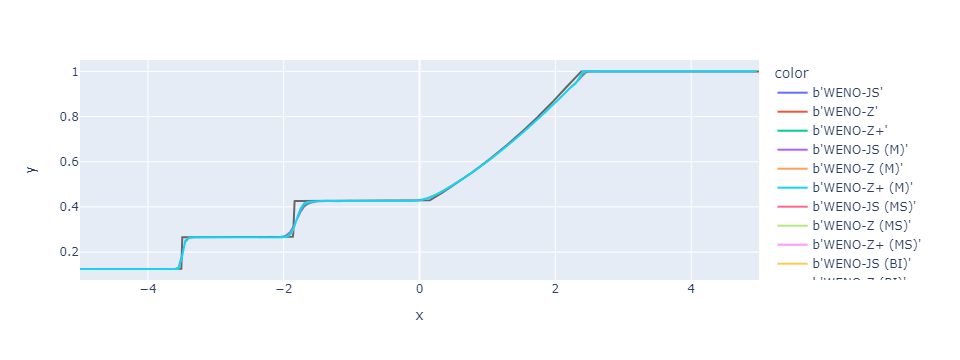

In [7]:
fig = ply_exp.line(
    data_frame = df    ,
    x          = x     ,
    y          = y     ,
    color      = label
)

# print(tf.range(interval[0], interval[1], Δx_ref, dtype=float_pres))

fig.add_trace(
    ply_go.Scatter(
        x    = tf.range(interval[0], interval[1], Δx_ref, dtype=float_pres),
        y    = u_ref[0],
        mode = "lines"                                           ,
        line = ply_go.scatter.Line(color="#666666")              ,
        name = "Referência (WENO-Z)"
    )
)
fig.show()

In [23]:
fig.write_html("C:/Users/daniw/OneDrive/Documentos/GitHub/Top_mat_A/WENO-BI/Shock_density_wave (epsilon=10^(-6)).html")

In [2]:
Sim_JS    = create_simulation(API_Numpy, euler_equation, WENO_JS    , mapping = null_mapping, map_function = None)[0]
Sim_Z     = create_simulation(API_Numpy, euler_equation, WENO_Z     , mapping = null_mapping, map_function = None)[0]
Sim_Zp    = create_simulation(API_Numpy, euler_equation, WENO_Z_plus, mapping = null_mapping, map_function = None)[0]
Sim_JS_M  = create_simulation(API_Numpy, euler_equation, WENO_JS    , mapping = post_mapping, map_function = Henrick_mapping)[0]
Sim_Z_M   = create_simulation(API_Numpy, euler_equation, WENO_Z     , mapping = post_mapping, map_function = Henrick_mapping)[0]
Sim_Zp_M  = create_simulation(API_Numpy, euler_equation, WENO_Z_plus, mapping = post_mapping, map_function = Henrick_mapping)[0]
Sim_JS_MS = create_simulation(API_Numpy, euler_equation, WENO_JS    , mapping =  pre_mapping, map_function = Hong_mapping)[0]
Sim_Z_MS  = create_simulation(API_Numpy, euler_equation, WENO_Z     , mapping =  pre_mapping, map_function = Hong_mapping)[0]
Sim_Zp_MS = create_simulation(API_Numpy, euler_equation, WENO_Z_plus, mapping =  pre_mapping, map_function = Hong_mapping)[0]
Sim_JS_BI = create_simulation(API_Numpy, euler_equation, WENO_JS    , mapping =  pre_mapping, map_function = BI_mapping)[0]
Sim_Z_BI  = create_simulation(API_Numpy, euler_equation, WENO_Z     , mapping =  pre_mapping, map_function = BI_mapping)[0]
Sim_Zp_BI = create_simulation(API_Numpy, euler_equation, WENO_Z_plus, mapping =  pre_mapping, map_function = BI_mapping)[0]


In [ ]:
t_final  = 0.07
n        = 400
interval = [0, 1]
Δx       = (interval[1]-interval[0])/n

fator  = 10 # Quantas vezes menor é a malha para a solução de referência
n_ref  = n*fator
Δx_ref = 2/n_ref

x     = tf.range(interval[0], interval[1], Δx    , dtype=float_pres)
x_ref = tf.range(interval[0], interval[1], Δx_ref, dtype=float_pres)

CFL = 0.5
γ   = 1.4    
ρ   = x-x+1
u   = x-x
p   = np.where(  x <  0.1, 1000, 0.01)
p   = np.where(0.9 <=   x,  100,    p)
E   = p/(γ-1)+ρ*(u**2)/2

Q = np.stack([ρ,ρ*u,E], axis=0)

ρ   = x-x+1
u   = x-x
p   = np.where(  x <  0.1, 1000, 0.01)
p   = np.where(0.9 <=   x,  100,    p)
E   = p/(γ-1)+ρ*(u**2)/2

Q_ref = np.stack([ρ,ρ*u,E], axis=0)


f = lambda Q: Q[0]

u_JS   = Q[...] # WENO-JS
u_Z    = Q[...] # WENO-Z
u_Zp   = Q[...] # WENO-Z+
u_JSM  = Q[...] # WENO-JS com mapeamento (Henrick)
u_ZM   = Q[...] # WENO-Z  com mapeamento (Henrick)
u_ZpM  = Q[...] # WENO-Z+ com mapeamento (Henrick)
u_JSMS = Q[...] # WENO-JS com mapeamento (Hong)
u_ZMS  = Q[...] # WENO-Z  com mapeamento (Hong)
u_ZpMS = Q[...] # WENO-Z+ com mapeamento (Hong)
u_JSBI = Q[...] # WENO-JS com mapeamento (BI)
u_ZBI  = Q[...] # WENO-Z  com mapeamento (BI)
u_ZpBI = Q[...] # WENO-Z+ com mapeamento (BI)

u_ref = Q_ref[...] # Solução de referência com o WENO-Z

BoundaryCondition = FronteiraReflexiva

u_JS  = Sim_JS(     u_JS  , t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-JS")
u_Z   = Sim_Z(      u_Z   , t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-Z")
u_Zp  = Sim_Zp(     u_Zp  , t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-Z+")
u_JSM = Sim_JS_M(   u_JSM , t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-JS (M)")
u_ZM  = Sim_Z_M(    u_ZM  , t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-Z (M)")
u_ZpM = Sim_Zp_M(   u_ZpM , t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-Z+ (M)")
u_JSMS = Sim_JS_MS( u_JSMS, t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-JS (MS)")
u_ZMS  = Sim_Z_MS(  u_ZMS , t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-Z (MS)")
u_ZpMS = Sim_Zp_MS( u_ZpMS, t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-Z+ (MS)")
u_JSBI = Sim_JS_BI( u_JSBI, t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-JS (BI)")
u_ZBI  = Sim_Z_BI(  u_ZBI , t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-Z (BI)")
u_ZpBI = Sim_Zp_BI( u_ZpBI, t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-Z+ (BI)")
u_ref  = Sim_Z(      u_ref, t_final, Δx_ref, CFL, BoundaryCondition)[:]
print("Referência")

In [3]:
t_final  = 0.07
n        = 400
interval = [0, 1]
Δx       = (interval[1]-interval[0])/n

fator  = 10 # Quantas vezes menor é a malha para a solução de referência
n_ref  = n*fator
Δx_ref = 2/n_ref

x     = tf.range(interval[0], interval[1], Δx    , dtype=float_pres)
x_ref = tf.range(interval[0], interval[1], Δx_ref, dtype=float_pres)

CFL = 0.5
γ   = 1.4    
k   = 5
ρ   = x-x+1
u   = x-x
p   = np.where(  x <  0.1, 1000, 0.01)
p   = np.where(0.9 <=   x,  100,    p)
E   = p/(γ-1)+ρ*(u**2)/2

Q = np.stack([ρ,ρ*u,E], axis=0)

ρ   = x-x+1
u   = x-x
p   = np.where(  x <  0.1, 1000, 0.01)
p   = np.where(0.9 <=   x,  100,    p)
E   = p/(γ-1)+ρ*(u**2)/2

Q_ref = np.stack([ρ,ρ*u,E], axis=0)


f = lambda Q: Q[0]

u_JS   = Q[...] # WENO-JS
u_Z    = Q[...] # WENO-Z
u_Zp   = Q[...] # WENO-Z+
u_JSM  = Q[...] # WENO-JS com mapeamento (Henrick)
u_ZM   = Q[...] # WENO-Z  com mapeamento (Henrick)
u_ZpM  = Q[...] # WENO-Z+ com mapeamento (Henrick)
u_JSMS = Q[...] # WENO-JS com mapeamento (Hong)
u_ZMS  = Q[...] # WENO-Z  com mapeamento (Hong)
u_ZpMS = Q[...] # WENO-Z+ com mapeamento (Hong)
u_JSBI = Q[...] # WENO-JS com mapeamento (BI)
u_ZBI  = Q[...] # WENO-Z  com mapeamento (BI)
u_ZpBI = Q[...] # WENO-Z+ com mapeamento (BI)

u_ref = Q_ref[...] # Solução de referência com o WENO-Z

BoundaryCondition = FronteiraReflexiva

# u_JS  = Sim_JS(     u_JS  , t_final, Δx    , CFL, BoundaryCondition)[:]
# print("WENO-JS")
# u_Z   = Sim_Z(      u_Z   , t_final, Δx    , CFL, BoundaryCondition)[:]
# print("WENO-Z")
# u_Zp  = Sim_Zp(     u_Zp  , t_final, Δx    , CFL, BoundaryCondition)[:]
# print("WENO-Z+")
# u_JSM = Sim_JS_M(   u_JSM , t_final, Δx    , CFL, BoundaryCondition)[:]
# print("WENO-JS (M)")
# u_ZM  = Sim_Z_M(    u_ZM  , t_final, Δx    , CFL, BoundaryCondition)[:]
# print("WENO-Z (M)")
# u_ZpM = Sim_Zp_M(   u_ZpM , t_final, Δx    , CFL, BoundaryCondition)[:]
# print("WENO-Z+ (M)")
# u_JSMS = Sim_JS_MS( u_JSMS, t_final, Δx    , CFL, BoundaryCondition)[:]
# print("WENO-JS (MS)")
# u_ZMS  = Sim_Z_MS(  u_ZMS , t_final, Δx    , CFL, BoundaryCondition)[:]
# print("WENO-Z (MS)")
# u_ZpMS = Sim_Zp_MS( u_ZpMS, t_final, Δx    , CFL, BoundaryCondition)[:]
# print("WENO-Z+ (MS)")
u_JSBI = Sim_JS_BI( u_JSBI, t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-JS (BI)")
u_ZBI  = Sim_Z_BI(  u_ZBI , t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-Z (BI)")
u_ZpBI = Sim_Zp_BI( u_ZpBI, t_final, Δx    , CFL, BoundaryCondition)[:]
print("WENO-Z+ (BI)")
u_ref  = Sim_Z(      u_ref, t_final, Δx_ref, CFL, BoundaryCondition)[:]
print("Referência")

C:\Users\daniw\OneDrive\Documentos\GitHub\Top_mat_A\WENO-BI\aux_func_V3.py:414: RuntimeWarning: invalid value encountered in sqrt
  A = self.API.sqrt(γ*P/Q0)


IndexError: index -2147483648 is out of bounds for axis 0 with size 10000

In [8]:
aux_x     = [  Δx,  Δx,   Δx,    Δx,   Δx,    Δx,     Δx,    Δx,     Δx,     Δx,    Δx,     Δx]
aux_y     = [u_JS, u_Z, u_Zp, u_JSM, u_ZM, u_ZpM, u_JSMS, u_ZMS, u_ZpMS, u_JSBI, u_ZBI, u_ZpBI]
aux_label = ["WENO-JS"     , "WENO-Z"     , "WENO-Z+"     ,
             "WENO-JS (M)" , "WENO-Z (M)" , "WENO-Z+ (M)" ,
             "WENO-JS (MS)", "WENO-Z (MS)", "WENO-Z+ (MS)",
             "WENO-JS (BI)", "WENO-Z (BI)", "WENO-Z+ (BI)"]

x     = tf.range(interval[0], interval[1], aux_x[0], dtype=float_pres)
y     = aux_y[0][0]
label = tf.repeat([aux_label[0]], [len(aux_y[0][0])])

for i in tf.range(1, len(aux_x)):
    x = tf.concat([x, tf.range(interval[0], interval[1], aux_x[i], dtype=float_pres)], axis = 0)
    y = tf.concat([y, aux_y[i][0]], axis = 0)
    label = tf.concat([label, tf.repeat([aux_label[i]], [len(aux_y[i][0])])], axis = 0)

df = pd.DataFrame(
    {
        "x"     : x     ,
        "y"     : y     ,
        "label" : label
    }
)

tf.Tensor([0.000e+00 5.000e-04 1.000e-03 ... 9.985e-01 9.990e-01 9.995e-01], shape=(2000,), dtype=float64)


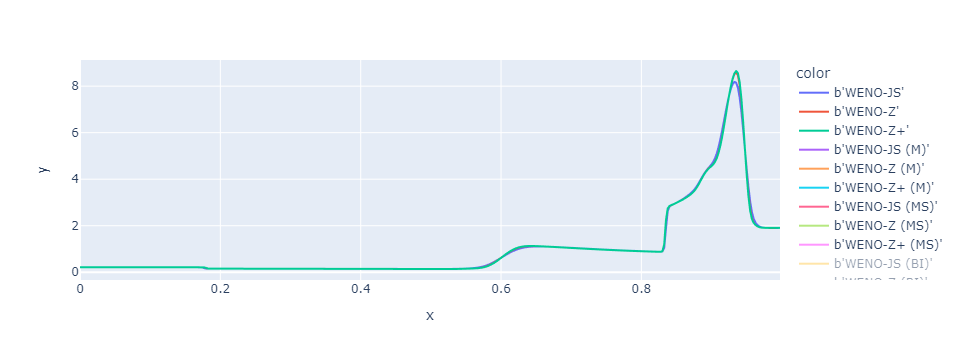

In [9]:
fig = ply_exp.line(
    data_frame = df    ,
    x          = x     ,
    y          = y     ,
    color      = label
)

print(tf.range(interval[0], interval[1], Δx_ref, dtype=float_pres))

fig.add_trace(
    ply_go.Scatter(
        x    = tf.range(interval[0], interval[1], Δx_ref, dtype=float_pres),
        y    = u_ref[0],
        mode = "lines"                                           ,
        line = ply_go.scatter.Line(color="#656565")              ,
        name = "Referência"
    )
)
fig.show()

In [6]:
fig.write_html("C:/Users/daniw/OneDrive/Documentos/GitHub/Top_mat_A/WENO-BI/shock_density_wave.html")